- **Name:** Ernie James Mago
- **Term:** AY 2024-2025

# Laboratory Experiment 002: Operational Amplifiers

This Jupyter Notebook demonstrates different operational amplifier (Op-Amp) configurations with Python simulations.

### Configurations Covered:
1. Inverting Amplifier
2. Non-Inverting Amplifier
3. Voltage Follower (Buffer)
4. Summing Amplifier
5. Integrator
6. Differentiator

Each section contains code to simulate the respective amplifier behavior and plots the output waveform.


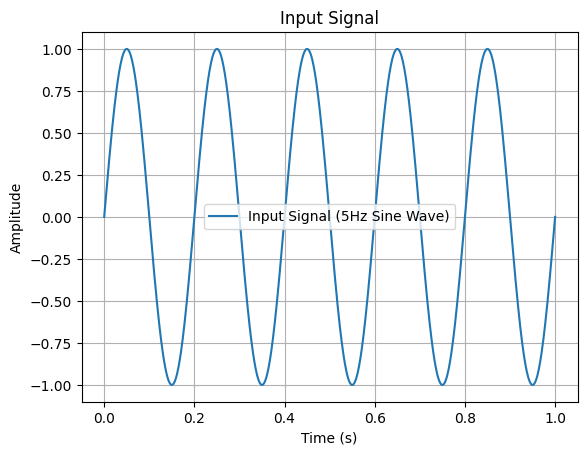

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Time vector for simulation
t = np.linspace(0, 1, 1000)
Vin = np.sin(2 * np.pi * 5 * t)  # Input signal (5 Hz sine wave)

# Define common parameters
Rf, Rin, R1, R2, C = 10e3, 1e3, 1e3, 1e3, 1e-6

# Plot Input Signal
plt.figure()
plt.plot(t, Vin, label='Input Signal (5Hz Sine Wave)')
plt.title('Input Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid('true')
plt.legend()
plt.show()

# 1. Inverting Amplifier
#### $V_o = - (R_f / R_i) * V_i$

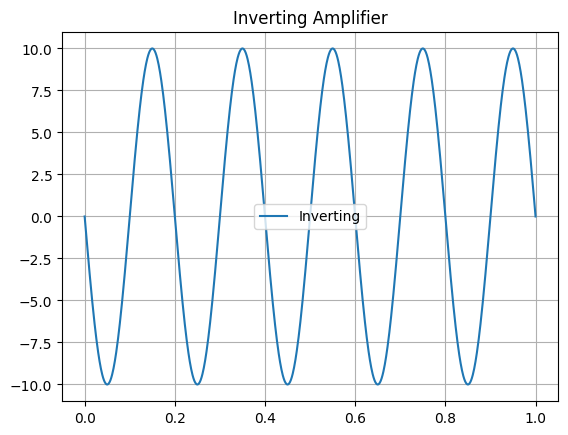

In [2]:
def inverting_amplifier(Vin, Rf, Rin):
    Av = -Rf / Rin
    return Av * Vin

Vout_inv = inverting_amplifier(Vin, Rf, Rin)
plt.figure()
plt.plot(t, Vout_inv, label='Inverting')
plt.title('Inverting Amplifier')
plt.grid('true')
plt.legend()
plt.show()


# 2. Non-Inverting Amplifier
#### $V_o = (1 + R_f/R_1) * V_i$

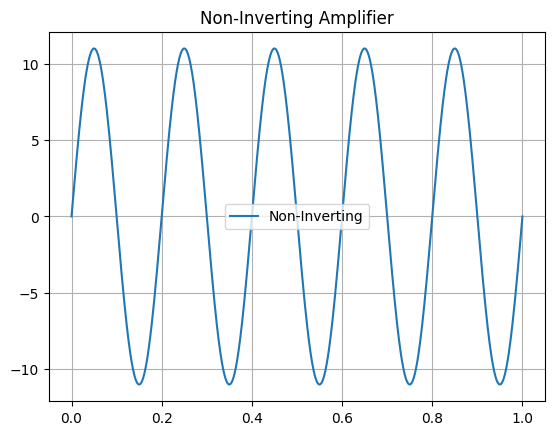

In [3]:
def non_inverting_amplifier(Vin, Rf, R1):
    Av = 1 + (Rf / R1)
    return Av * Vin

Vout_noninv = non_inverting_amplifier(Vin, Rf, R1)
plt.figure()
plt.plot(t, Vout_noninv, label='Non-Inverting')
plt.title('Non-Inverting Amplifier')
plt.grid('true')
plt.legend()
plt.show()


# 3. Voltage Follower (Buffer)

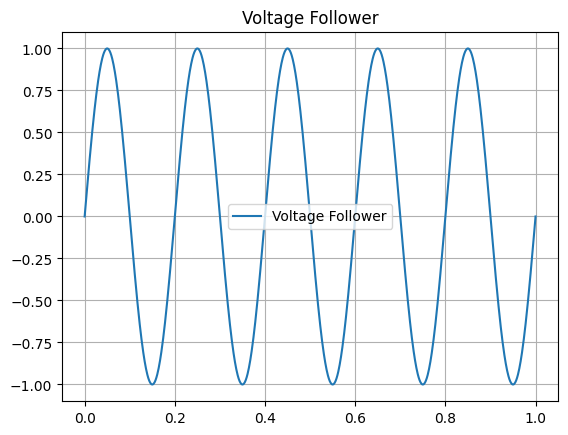

In [4]:
def voltage_follower(Vin):
    return Vin

Vout_follow = voltage_follower(Vin)
plt.figure()
plt.plot(t, Vout_follow, label='Voltage Follower')
plt.title('Voltage Follower')
plt.grid('true')
plt.legend()
plt.show()


# 4. Summing Amplifier
#### $Vout = - ((Rf/R1) * Vin1 + (Rf/R2) * Vin2)$

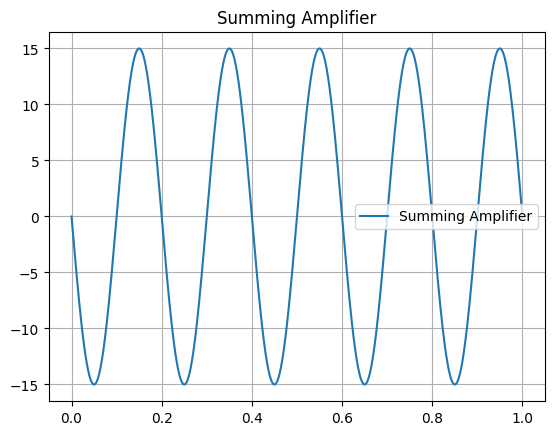

In [5]:
def summing_amplifier(Vin1, Vin2, Rf, R1, R2):
    return -((Rf/R1) * Vin1 + (Rf/R2) * Vin2)

Vout_sum = summing_amplifier(Vin, Vin / 2, Rf, R1, R2)
plt.figure()
plt.plot(t, Vout_sum, label='Summing Amplifier')
plt.title('Summing Amplifier')
plt.grid('true')
plt.legend()
plt.show()


# 5. Integrator
#### $Vout = - (1 / (R*C)) * integral(Vin)$

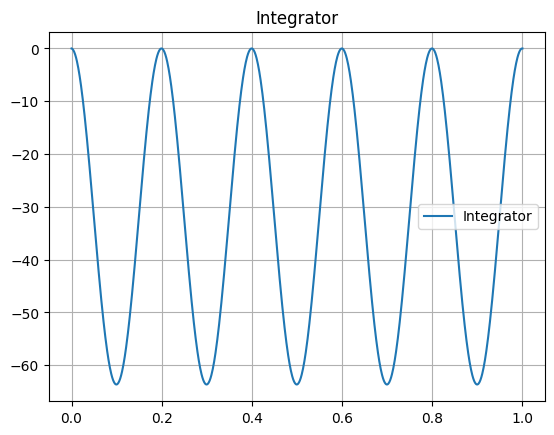

In [6]:
def integrator(Vin, R, C, t):
    return (-1 / (R * C)) * np.cumsum(Vin) * (t[1] - t[0])

Vout_int = integrator(Vin, R1, C, t)
plt.figure()
plt.plot(t, Vout_int, label='Integrator')
plt.title('Integrator')
plt.grid('true')
plt.legend()
plt.show()


# 6. Differentiator
#### $Vout = - R*C * d(Vin)/dt$

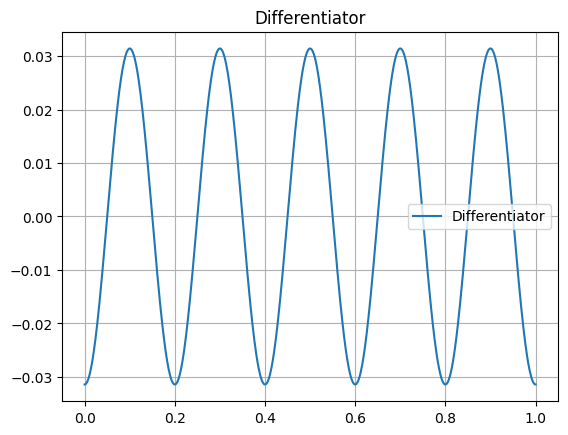

In [7]:
def differentiator(Vin, R, C, t):
    return -R * C * np.gradient(Vin, t)

Vout_diff = differentiator(Vin, R1, C, t)
plt.figure()
plt.plot(t, Vout_diff, label='Differentiator')
plt.title('Differentiator')
plt.grid('true')
plt.legend()
plt.show()


# 7. Active Low Pass Filter

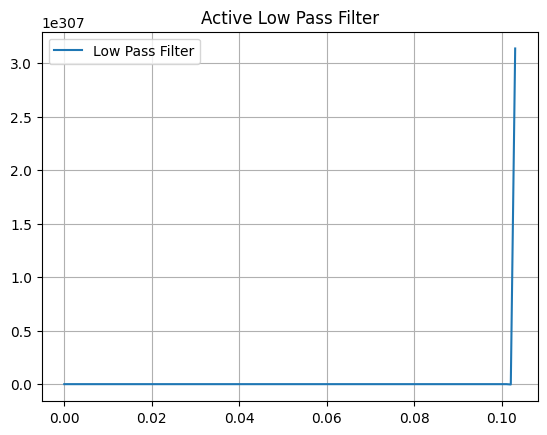

In [8]:
def low_pass_filter(Vin, R, C, t):
    tau = R * C
    return signal.lfilter([1], [tau, 1], Vin)

Vout_lp = low_pass_filter(Vin, R1, C, t)
plt.figure()
plt.plot(t, Vout_lp, label='Low Pass Filter')
plt.title('Active Low Pass Filter')
plt.grid('true')
plt.legend()
plt.show()

# 8. Astable Multivibrator

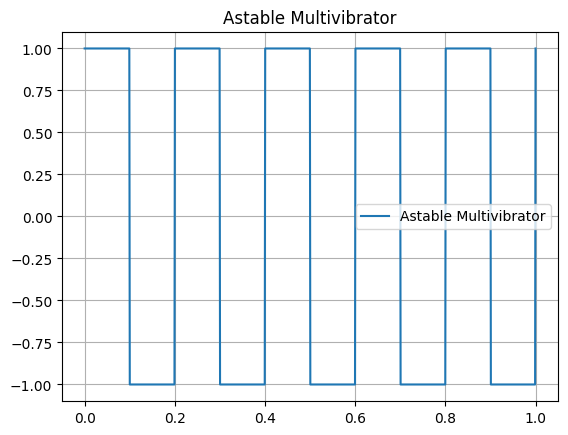

In [9]:
def astable_multivibrator(t, f=5, duty=0.5):
    return signal.square(2 * np.pi * f * t, duty)

Vout_astable = astable_multivibrator(t)
plt.figure()
plt.plot(t, Vout_astable, label='Astable Multivibrator')
plt.title('Astable Multivibrator')
plt.grid('true')
plt.legend()
plt.show()

# 9. Monostable Multivibrator

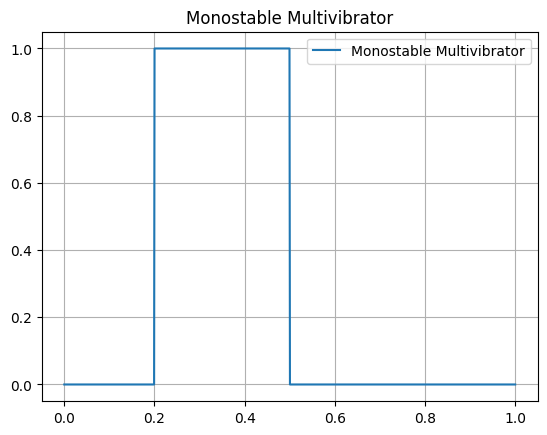

In [10]:
def monostable_multivibrator(t, trigger_time=0.2, pulse_duration=0.3):
    Vout_mono = np.zeros_like(t)
    Vout_mono[(t >= trigger_time) & (t <= (trigger_time + pulse_duration))] = 1
    return Vout_mono

Vout_monostable = monostable_multivibrator(t)
plt.figure()
plt.plot(t, Vout_monostable, label='Monostable Multivibrator')
plt.title('Monostable Multivibrator')
plt.grid('true')
plt.legend()
plt.show()